<a href="https://colab.research.google.com/github/Harshvardhan-Moundekar/Machine_Learning/blob/main/ML_P03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Practical No. 03</h1>
<h6>F1 score, accuracy, recall, & precision of training model</h6>

In [1]:
from google.colab import files
file = files.upload()


Saving customer_churn.csv to customer_churn.csv


In [31]:
import pandas as pd # pandas imported and aliased as pd

#Dataset Loading
df = pd.read_csv('/content/customer_churn.csv')
df.head()



,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [33]:
#Drop Irrelevant Data Column

df = df.drop(columns = ['Onboard_date', 'Location', 'Company'])
df.head()


,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


In [34]:
#Handling Missing values
print(df.isnull().sum())

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Churn              0
dtype: int64


Churn
0    750
1    150
Name: count, dtype: int64


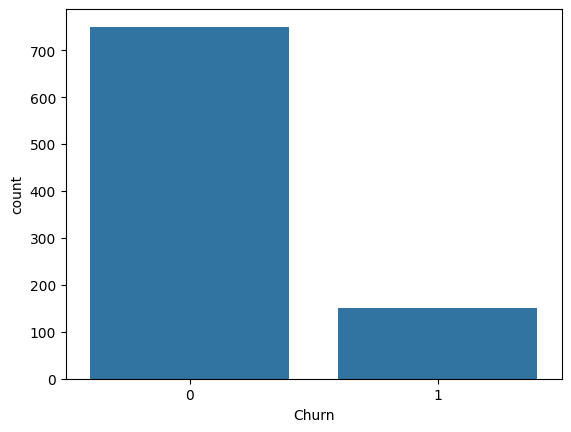

In [35]:
#Chart for analyze the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Churn', data=df)
plt.show

print(df['Churn'].value_counts())


In [36]:
#Split Dataset in specific ration

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Names'] = label_encoder.fit_transform(df['Names'])
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state = 0)


In [37]:
X_train.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites
548,417,31.0,7073.61,0,5.73,9.0
204,549,48.0,9706.88,0,6.45,8.0
55,379,40.0,9922.30,1,5.07,11.0
65,507,47.0,7222.35,0,6.41,11.0
736,598,48.0,9219.40,1,5.91,6.0


In [38]:
y_train.head()

,Churn
548,0
204,0
55,1
65,1
736,0


In [39]:
#What is the ration of train and test dataset
print(X_train.shape)
print(X_test.shape)

(855, 6)
(45, 6)


In [45]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
#Assess Logistics Regression using Metrics (Apply formula)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1 Score: ", f1)


Accuracy: 0.9111111111111111
F1 Score:  0.5


In [66]:
precision = precision_score(y_test, y_pred)
print("Precision Score: ", precision)

recall = recall_score(y_test, y_pred)
print("Recall Score: ", recall)


Precision Score:  1.0
Recall Score:  0.3333333333333333


In [71]:
#Condusion Matrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score: ", roc_auc)



[[39  0]
 [ 4  2]]
ROC-AUC Score:  0.6666666666666666
